In [199]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from tqdm import tqdm
import tensorflow as tf
from keras.layers import Dense,Flatten,Dropout
from keras import Sequential
from keras.optimizers import Adam

In [178]:
mnist = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()
class_names = [x for x in range(0,10)]
#60000  28X28  --> tarin, test --> 10000 28X28  all are uint8  means 8bit integer

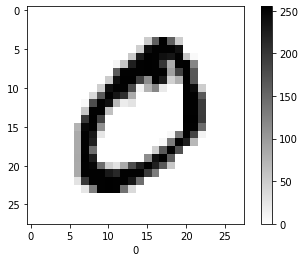

In [103]:
image,lable = X_train[1],y_train[1]
image = image.reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.xlabel(lable)
plt.colorbar()
plt.grid(False)
plt.show()

In [180]:
#preprocessing
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [200]:
model = Sequential([Flatten(input_shape=(28,28,)),
                    Dense(128,activation='relu'),
                    Dropout(0.2),
                    Dense(10,activation='softmax')
                   ])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [201]:
history = model.fit(X_train,y_train,epochs=5)
print('train loss : {}, train accuracy : {}'.format(history.history['loss'][4],history.history['accuracy'][4]))
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('test loss : {}, test accuracy : {}'.format(test_loss,test_accuracy))

Epoch 1/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.2922 - accuracy: 0.9154
Epoch 2/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.1447 - accuracy: 0.9565
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.1081 - accuracy: 0.9673
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0885 - accuracy: 0.9726
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0755 - accuracy: 0.9762
train loss : 0.0754634037050729, train accuracy : 0.9762333035469055
10000/10000 [==============================] - 0s 34us/step
test loss : 0.08621780955698341, test accuracy : 0.9750000238418579


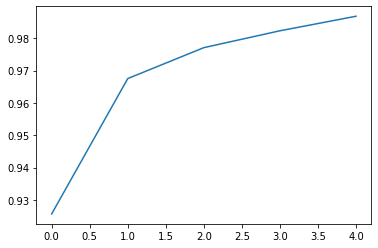

In [185]:
plt.plot(history.history['accuracy'])
plt.show()

In [188]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('test loss : {}, test accuracy : {}'.format(test_loss,test_accuracy))
#test loss : 0.0743863081454765, test accuracy : 0.9787999987602234

10000/10000 [==============================] - 0s 32us/step
test loss : 0.0743863081454765, test accuracy : 0.9787999987602234
